<a href="https://colab.research.google.com/github/patty-gz02/Colaboratory/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de redes neuronales con TF**

***¿Qué es TensorFlow (TF)?***

Biblioteca de software de código abierto desarrollada por Google Brain Team para redes neuronales profundas.


*   Funciona con todos los lenguajes populares como Python, C++, Java, R y Go.
*   TensorFlow proporciona API
estables de Python y C++.

*   Keras: una API de red neuronal de alto nivel que se ha integrado con TensorFlow, especifica cómo deben interactuar los componentes de
software.

* TensorFlow permite la implementación del modelo y la facilidad de uso en producción.

* Cuenta con un muy buen soporte comunitario.


 ***¿Qué es Keras?***

API para componer bloques de construcción para crear y entrenar modelos de aprendizaje
profundo


**Introducción a las redes neuronales**

representan una clase de modelos de aprendizaje automático
inspirados libremente en estudios sobre los sistemas nerviosos centrales de los mamíferos. Cada ANN se compone de
varias "neuronas" interconectadas, organizadas en "capas"

***Perceptrón:***  Es un algoritmo simple que, dado un vector de entrada x de m valores (x1, x2,... y xm), a menudo llamado
características de entrada o simplemente características, genera un 1 ("sí") o un 0 (“no”). Matemáticamente definimos una
función:

 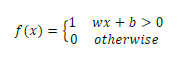


**Nuestro primer ejemplo de código TensorFlow**
Hay tres formas de crear un modelo en tf.keras: API secuencial, API funcional y subclases de modelo. En esta ocasion , usaremos el más simple, Sequential():


In [ ]:
import tensorflow as tf
from tensorflow import keras
NB_CLASSES = 10 # Define una variable NB_CLASSES y la establece en 10
RESHAPED = 784 # Define una variable RESHAPED y la establece en 784
model = tf.keras.models.Sequential() #rea un modelo secuencial, que es un tipo de modelo de Keras donde las capas se apilan linealmente.
model.add(keras.layers.Dense(NB_CLASSES,input_shape=(RESHAPED,),
                             kernel_initializer='zeros',
                             name='dense_layer', activation='softmax'))

**Perceptrón multicapa: nuestro primer ejemplo de red**

El “perceptrón” era el nombre que se le daba al modelo que tenía una sola capa lineal y, como consecuencia, si tiene múltiples capas, lo llamamos Perceptrón Multicapa (MLP).

***Función de activación: sigmoide***

*  Definición matemática: σ(x) = 1 / (1 + e^
(-x))
*  Comportamiento: Mapea cualquier valor real a un rango entre 0 y 1. Es suave y diferenciable en todo su dominio.
*  Uso: Históricamente popular en la capa de salida para problemas de clasificación binaria, ya que su salida puede interpretarse como una probabilidad.

***Función de activación: Tanh (Tangente Hiperbólica)***

*  Definición matemática: tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
*  Comportamiento: Mapea cualquier valor real a un rango entre -1 y 1. Similar a la sigmoide, pero centrada en cero.
*  Uso: Se utiliza comúnmente en las capas ocultas.


***Función de activación: ReLU***

*  Definición matemática: ReLU(x) = max(0, x)
*  Comportamiento: Devuelve el valor de entrada si es positivo, y cero si es negativo.
*  Uso: La función de activación más popular en las capas ocultas debido a su eficiencia computacional y capacidad para evitar el problema del gradiente desvaneciente.

***Función de activación: Leaky ReLU**

*  Definición matemática: LeakyReLU(x) = max(αx, x), donde α es un pequeño valor positivo (por ejemplo, 0.01).
*  Comportamiento: Similar a ReLU, pero permite que los valores negativos pasen con una pequeña pendiente, lo que ayuda a evitar el problema de las neuronas muertas.
*  Uso: Una variante de ReLU que se utiliza para mitigar el problema de las neuronas muertas.


***Función de activación: Leaky ReLUELU (Unidad Lineal Exponencial)**


*  Definición matemática: ELU(x) = x si x > 0, α(exp(x) - 1) si x ≤ 0, donde α es un hiperparámetro no negativo.
*  Comportamiento: Combina las ventajas de ReLU y tanh. Para valores positivos es lineal, y para valores negativos tiene una forma exponencial que se acerca a -α cuando x tiende a menos infinito.
*  Uso: Puede mejorar la precisión y la velocidad de convergencia en comparación con ReLU.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # numero de digitos
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # porcentaje para el Train

# Cargamos MNIST dataset.
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # Carga el conjunto de datos MNIST y lo divide en entrenamiento y prueba

# X_train contiene 60,000 imágenes de 28x28 píxeles. Las transformamos en vectores de 784 elementos.
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED) # Lo mismo para las imágenes de prueba

# Convertimos los valores de los píxeles en números de punto flotante de 32 bits
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizamos los valores de los píxeles para que estén en el rango [0, 1]
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

60000 train samples
10000 test samples


Puede ver en el código anterior que la capa de entrada tiene una neurona asociada a cada píxel de la imagen
para un total de 28 x 28 = 784 neuronas, una para cada píxel en las imágenes MNIST.


In [ ]:
# Build the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
input_shape=(RESHAPED,),
name='dense_layer',
activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Una vez que definimos el modelo, tenemos que compilarlo para que pueda ser ejecutado por TensorFlow. Hay algunas
opciones que se deben tomar durante la compilación. En primer lugar, debemos seleccionar un optimizador, que es el
algoritmo específico utilizado para actualizar los pesos mientras entrenamos nuestro modelo.

Al compilar un modelo en TensorFlow, es posible seleccionar el optimizador, la función de pérdida y la métrica utilizada
junto con un modelo determinado:

In [ ]:
# Compiling the model.
model.compile(optimizer='SGD',
loss='categorical_crossentropy',
metrics=['accuracy'])

Entrenar un modelo en TensorFlow es muy simple:

In [ ]:
# Training the model.
model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=EPOCHS,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4976 - loss: 1.7469 - val_accuracy: 0.8252 - val_loss: 0.8974
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8193 - loss: 0.8538 - val_accuracy: 0.8552 - val_loss: 0.6591
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8415 - loss: 0.6726 - val_accuracy: 0.8678 - val_loss: 0.5634
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8598 - loss: 0.5820 - val_accuracy: 0.8767 - val_loss: 0.5102
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.5408 - val_accuracy: 0.8813 - val_loss: 0.4760
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.5048 - val_accuracy: 0.8848 - val_loss: 0.4516
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8751 - loss: 0.4781 - val_accuracy: 0.8888 - val_loss: 0.4333
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8798 - loss: 0.4561 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9101 - loss: 0.3163
Test accuracy: 0.921999990940094


**Mejorando la red simple en TensorFlow con capas ocultas**

Una mejora inicial es agregar capas adicionales a nuestra red porque estas neuronas adicionales podrían ayudar intuitivamente
a aprender patrones más complejos en los datos de entrenamiento. En otras palabras, las capas adicionales agregan más
parámetros, lo que potencialmente permite que un modelo memorice patrones más complejos

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
# Network and training.
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
# Loading MNIST dataset.

# Labels have one-hot representation.
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize inputs within [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# One-hot representations for labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)
# Building the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
input_shape=(RESHAPED,),
name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
name='dense_layer_3', activation='softmax'))
# Summary of the model.
model.summary()
# Compiling the model.
model.compile(optimizer='SGD',
loss='categorical_crossentropy',
metrics=['accuracy'])
# Training the model.
model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=EPOCHS,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

60000 train samples
10000 test samples


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2843 - loss: 2.0639 - val_accuracy: 0.8203 - val_loss: 0.9066
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6936 - loss: 1.0171 - val_accuracy: 0.8723 - val_loss: 0.5220
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7754 - loss: 0.7238 - val_accuracy: 0.8903 - val_loss: 0.4156
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8135 - loss: 0.6084 - val_accuracy: 0.9005 - val_loss: 0.3648
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8384 - loss: 0.5405 - val_accuracy: 0.9080 - val_loss: 0.3310
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8509 - loss: 0.4984 - val_accuracy: 0.9158 - val_loss: 0.3080
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8616 - loss: 0.4582 - val_accuracy: 0.9183 - val_loss: 0.2897
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8708 - loss: 0.4348 - val_accu

**Mejorando aún más la red simple en TensorFlow con abandono**

Una segunda mejora es muy sencilla. Decidimos eliminar aleatoriamente, con la probabilidad de DROPOUT , algunos de
los valores propagados dentro de nuestra densa red interna de capas ocultas durante el entrenamiento. En el aprendizaje
automático, esta es una forma bien conocida de regularización. Sorprendentemente, esta idea de eliminar algunos
valores al azar puede mejorar nuestro rendimiento.

In [ ]:
import tensorflow as tf
from tensorflow import keras
# Network and training.
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
# Loading MNIST dataset.
# Labels have one-hot representation.
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize inputs to be within in [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# Labels have one-hot representation.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)
# Build the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
input_shape=(RESHAPED,),
name='dense_layer', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES,
name='dense_layer_3', activation='softmax'))
# Summary of the model.
model.summary()
# Compiling the model.
model.compile(optimizer='SGD',
loss='categorical_crossentropy',
metrics=['accuracy'])
# Training the model.
model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=EPOCHS,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

60000 train samples
10000 test samples


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4225 - loss: 1.9134 - val_accuracy: 0.8404 - val_loss: 0.7400
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8428 - loss: 0.6593 - val_accuracy: 0.8838 - val_loss: 0.4493
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8781 - loss: 0.4565 - val_accuracy: 0.9003 - val_loss: 0.3705
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8937 - loss: 0.3858 - val_accuracy: 0.9092 - val_loss: 0.3306
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9056 - loss: 0.3404 - val_accuracy: 0.9145 - val_loss: 0.3071
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9092 - loss: 0.3193 - val_accuracy: 0.9195 - val_loss: 0.2888
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9126 - loss: 0.3057 - val_accuracy: 0.9228 - val_loss: 0.2746
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9171 - loss: 0.2880 - val_accuracy: 0.